In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from skimage.feature import hog
from skimage import data, exposure

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#with open('../input/best-artworks-of-all-time/artists.csv') as f:

commas = pd.read_csv('../input/best-artworks-of-all-time/artists.csv')
commas.drop('years',inplace=True,axis=1)
commas.drop('id',inplace=True,axis=1)
commas.drop('bio',inplace=True,axis=1)
commas.drop('wikipedia',inplace=True,axis=1)
print("Paintings by Genre")
print(commas.groupby(by=["genre"]).sum())
#print(commas)

Paintings by Genre
                                         paintings
genre                                             
Abstract Expressionism                          24
Baroque                                        586
Byzantine Art                                   99
Cubism                                         439
Early Renaissance                              164
Expressionism                                  193
Expressionism,Abstractionism                    88
Expressionism,Abstractionism,Surrealism        188
High Renaissance                               301
High Renaissance,Mannerism                     255
Impressionism                                 1370
Impressionism,Post-Impressionism               277
Mannerism                                       87
Neoplasticism                                   84
Northern Renaissance                           680
Pop Art                                        181
Post-Impressionism                            1048
Primitivism 

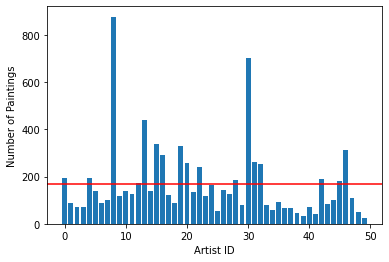

Average number of paintings from each arist: 168


In [2]:
plt.bar(np.arange(len(commas['name'])),commas['paintings'])
plt.xlabel("Artist ID")
plt.ylabel("Number of Paintings")
average_paintings = (sum(commas['paintings']/len(commas['paintings'])))
plt.axhline(y=average_paintings,c='red',label="average")
plt.show()

print("Average number of paintings from each arist: %i" % average_paintings)

/kaggle/input/best-artworks-of-all-time/images/images/Alfred_Sisley/Alfred_Sisley_53.jpg
(1080, 1328)
256


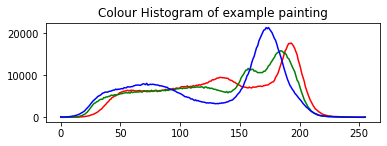

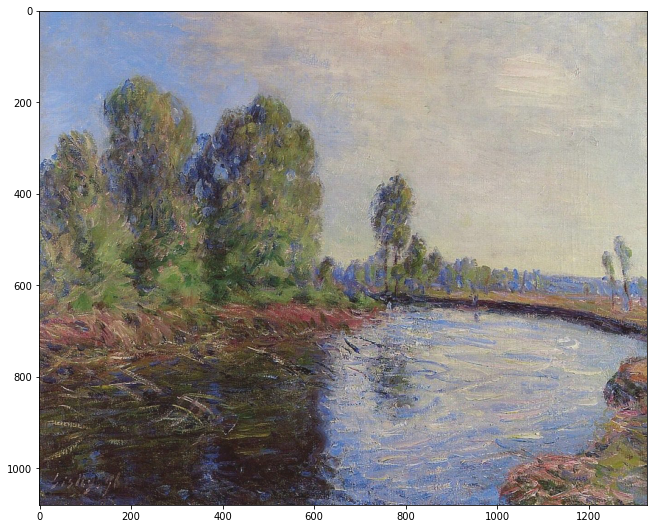

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input/best-artworks-of-all-time/images/images/Alfred_Sisley'):
    for filename in filenames[0:1]:
        fullname=os.path.join(dirname, filename)
        print(fullname)
        
        im = plt.imread(fullname)
        print(np.shape(im[:,:,0]))
        histR = np.bincount(np.reshape(im[:,:,0],-1))
        histG = np.bincount(np.reshape(im[:,:,1],-1))
        histB = np.bincount(np.reshape(im[:,:,2],-1))
        
        fd, hog_image = hog(im, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1),visualize=True)
        
        print(len(histR))
        plt.subplot(2,1,1)
        plt.title("Colour Histogram of example painting")
        plt.plot(histR,c='r')
        plt.plot(histG,c='g')
        plt.plot(histB,c='b')
        plt.figure(figsize=(15,20))
        
        plt.subplot(2,1,2)
        plt.imshow(im,cmap='gray')
        plt.show()



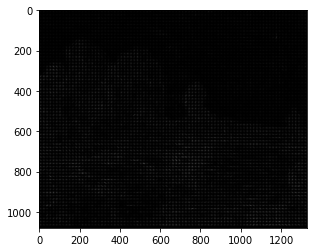

In [4]:
        plt.imshow(hog_image,cmap='gray')
        plt.show()